## Previsão de vendas do Big Mart

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [ ]:
df= pd.read_csv("/content/train_v9rqX0R.csv", delimiter = ",")

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
dflimpo = df.drop(["Outlet_Identifier","Item_Identifier"],axis=1)

In [ ]:
#verificando as variaveis
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#descriçao das variaveis
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#valores únicos
for col in df.columns:
  valoresunicos = df[col].unique()
  print(valoresunicos)

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63   9.285  7.975 15.7    8.98

In [ ]:
#verificando valor ausente
dflimpo.isnull().mean()*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
#preenchendo
#como valor ausentes era alto optei por preencher com "desconhecido"
dflimpo['Outlet_Size'].fillna('desconhecido', inplace=True)


In [ ]:
#
dflimpo['Item_Weight'].interpolate(method='linear', inplace=True)


In [ ]:
dflimpo.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,desconhecido,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#econding de variavel
le = LabelEncoder()
dflimpo["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])
dflimpo["Item_Type"] = le.fit_transform(df["Item_Type"])
dflimpo["Outlet_Location_Type	"] = le.fit_transform(df["Outlet_Location_Type"])
dflimpo["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])



In [ ]:
dflimpo["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])

In [ ]:
dflimpo["Outlet_Size	"] = le.fit_transform(df["Outlet_Size"])


In [ ]:
dflimpo.drop(columns = ['Outlet_Location_Type'], inplace = True)

In [ ]:
dflimpo.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Outlet_Location_Type\t,Outlet_Size\t
0,9.30,1,0.016047,4,249.8092,1999,1,1,3735.1380,0,1
1,5.92,2,0.019278,14,48.2692,2009,1,2,443.4228,2,1
2,17.50,1,0.016760,10,141.6180,1999,1,1,2097.2700,0,1
3,19.20,2,0.000000,6,182.0950,1998,3,0,732.3800,2,3
4,8.93,1,0.000000,9,53.8614,1987,0,1,994.7052,2,0


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


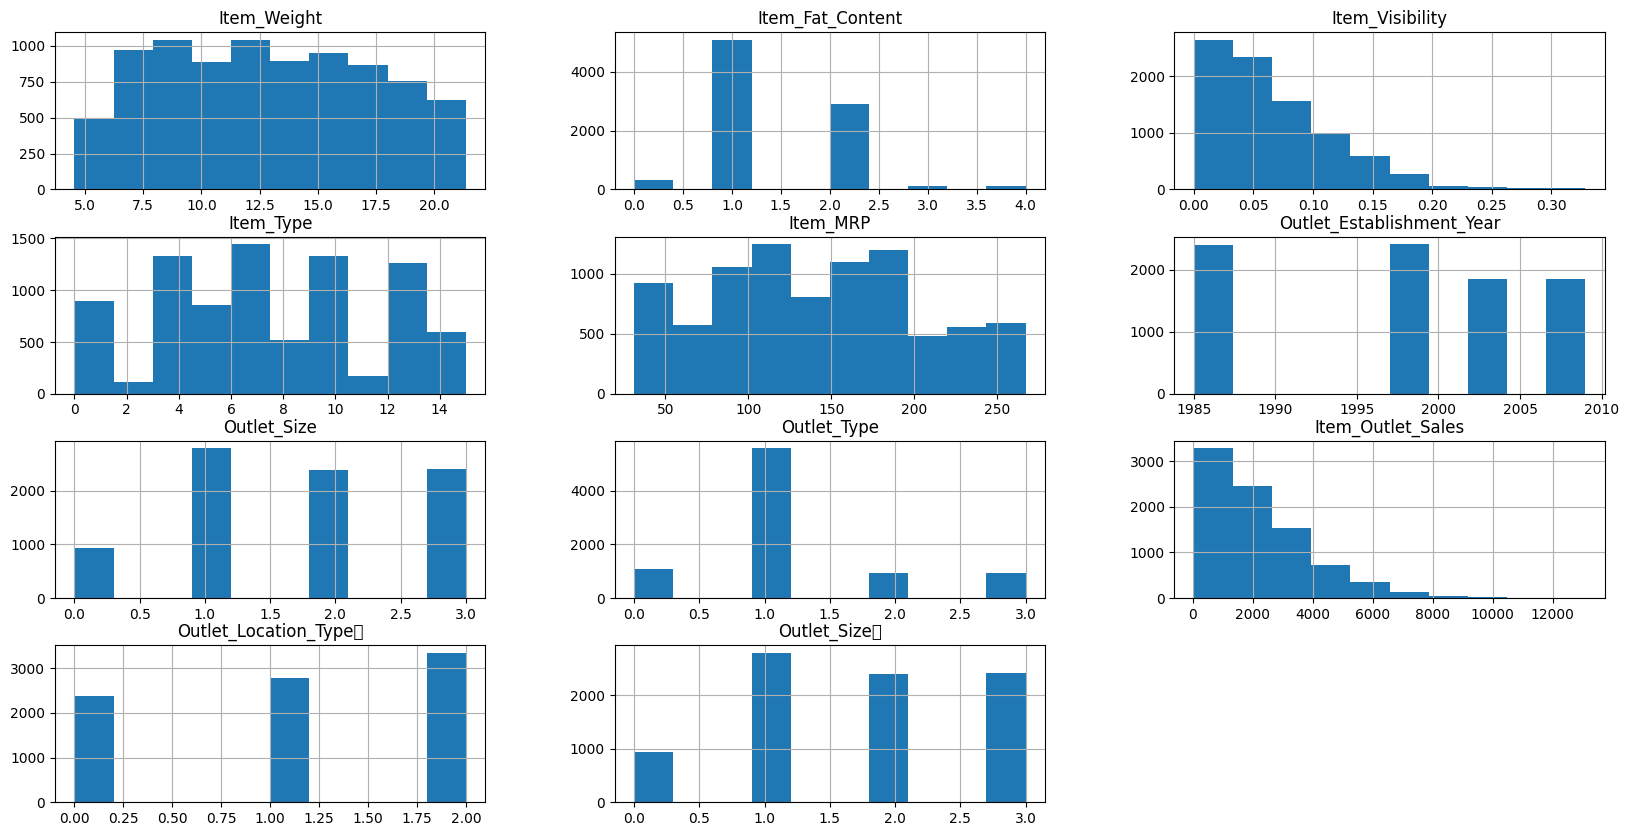

In [ ]:
# Como todas as variàveis sao numericas, vamos plotar seus respectivos histogramas
dflimpo.hist()
plt.gcf().set_size_inches(20, 10)

In [ ]:
# ANALISANDO MULTICOLINEARIDADE
correlation_matrix = dflimpo.corr()
# Verificando as correlações fortes
strong_correlations = (correlation_matrix > 0.7) & (correlation_matrix < 1.0)
# Identificando as criáveis com multicolinearidade
multicollinear_vars = set()
for col in strong_correlations.columns:
    correlated_vars = strong_correlations.index[strong_correlations[col]]
    if len(correlated_vars) > 1:
        multicollinear_vars.update(correlated_vars)

if multicollinear_vars:
    print("\nVariáveis com multicolinearidade:{}".format(multicollinear_vars))

else:
    print("\nNão foi encontrada multicolinearidade entre as variáveis.")


Não foi encontrada multicolinearidade entre as variáveis.


## treinamento modelo

In [ ]:
x = dflimpo.drop('Item_Outlet_Sales',axis=1)
y = dflimpo['Item_Outlet_Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Outlet_Location_Type\t,Outlet_Size\t
0,9.300,1,0.016047,4,249.8092,1999,1,1,0,1
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,1
2,17.500,1,0.016760,10,141.6180,1999,1,1,0,1
3,19.200,2,0.000000,6,182.0950,1998,3,0,2,3
4,8.930,1,0.000000,9,53.8614,1987,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,1,2,0
8519,8.380,2,0.046982,0,108.1570,2002,3,1,1,3
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,2
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1


In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=10)
# Treinar o modelo usando os dados de treinamento
modelo=LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
#previsões nos dados de teste
y_pred = modelo.predict(x_teste)

In [ ]:
#avaliando acuracia pelo erro quadrado
r2 = r2_score(y_teste, y_pred)
print(r2)

0.4970709592957615


In [ ]:
regressor = XGBRegressor()
regressor.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediction on training data
treinoxg = regressor.predict(x_treino)

In [ ]:
# R squared Value
r2_treinoxg = metrics.r2_score(y_treino, treinoxg)

In [ ]:
print('acurácia = ', r2_treinoxg)

acurácia =  0.8823999183163791
